In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# Check Data

In [2]:
Data=pd.read_csv('../input/games-of-all-time-from-metacritic/games_of_all_time.csv')


In [3]:
Data.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [4]:
Data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'description',
       'url', 'developer', 'genre', 'type', 'rating'],
      dtype='object')

In [5]:
Data.describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


In [7]:
Data.rating.unique().tolist()

['E', 'T', 'E10+', 'M', nan, 'K-A', 'RP', 'AO']

# Clean Data

In [8]:
Data.isnull().sum()

game_name         0
meta_score        0
user_score        0
platform          0
description       0
url               0
developer        10
genre             4
type           2104
rating         1140
dtype: int64

In [9]:
Data.fillna('null',inplace=True)

In [10]:
Data.isnull().sum()

game_name      0
meta_score     0
user_score     0
platform       0
description    0
url            0
developer      0
genre          0
type           0
rating         0
dtype: int64

# Basic Data Analysis

In [11]:
Data[['rating','user_score']].groupby(["rating"],as_index=False).mean().sort_values(by='user_score',ascending=True)

,rating,user_score
0,AO,34.000000
5,RP,65.335714
7,null,67.838772
2,E10+,69.426330
1,E,70.007507
4,M,70.368599
6,T,70.648938
3,K-A,81.583333


In [12]:
Data[['rating','meta_score']].groupby(["rating"],as_index=False).mean().sort_values(by='meta_score',ascending=True)

,rating,meta_score
0,AO,41.000000
5,RP,66.880714
2,E10+,70.454761
6,T,70.503392
1,E,70.527600
7,null,71.714175
4,M,71.743713
3,K-A,85.416667


In [13]:
Data[['type','user_score']].groupby(["type"],as_index=False).mean().sort_values(by='user_score',ascending=True)

,type,user_score
1,null,67.351141
0,multiplayer,70.364000
2,singleplayer,71.009328


In [14]:
Data[['type','meta_score']].groupby(["type"],as_index=False).mean().sort_values(by='meta_score',ascending=True)

,type,meta_score
1,null,69.411991
2,singleplayer,71.159561
0,multiplayer,71.527762


## Numerical Description  

In [15]:
def hist_plot(a,b):
    plt.figure(figsize=(9,5))
    sns.histplot(Data,x=a,hue=b)
    plt.xlabel(a)
    plt.ylabel("Frequency")
    plt.show()    


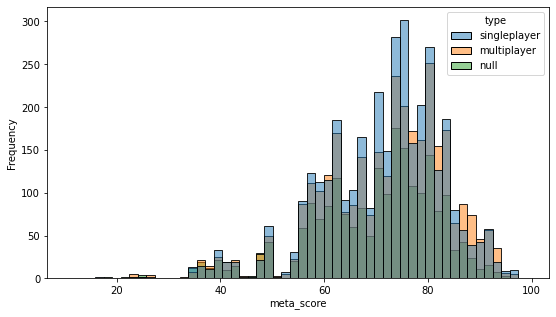

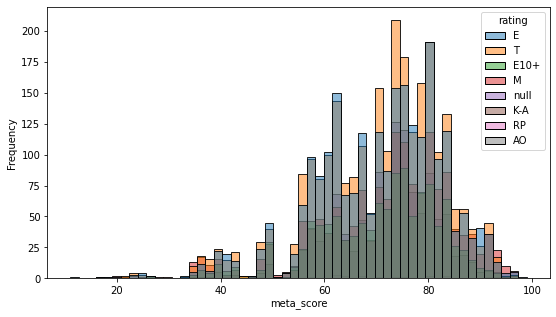

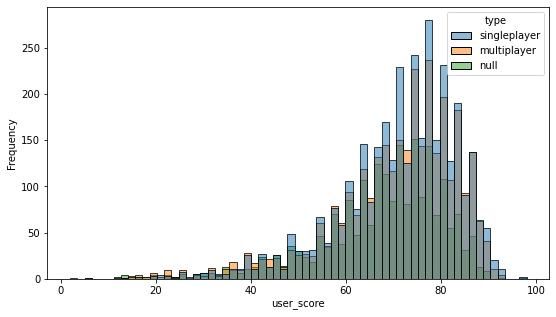

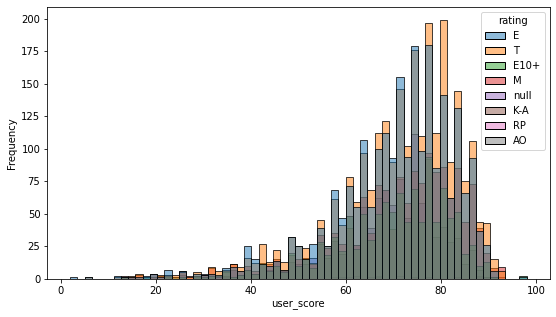

In [16]:
a=["meta_score","user_score"]
b=["type","rating"]
for i in a:
    for j in b:
        hist_plot(i,j)

## Categorical Description

In [17]:
def bar_plot(b):
    var=Data[b]
    varValue=var.value_counts()
    
    plt.figure(figsize=(9,5))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(b)
    plt.show()
    print("{}:\n {}".format(b,varValue))
    
    
 

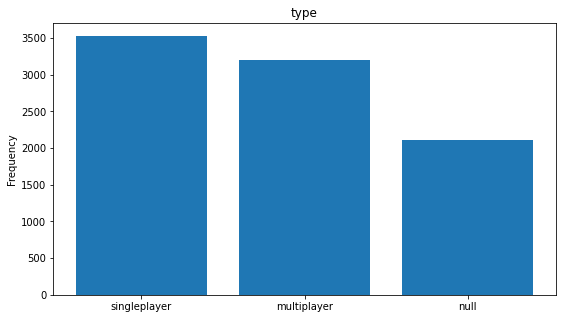

type:
 singleplayer    3527
multiplayer     3200
null            2104
Name: type, dtype: int64


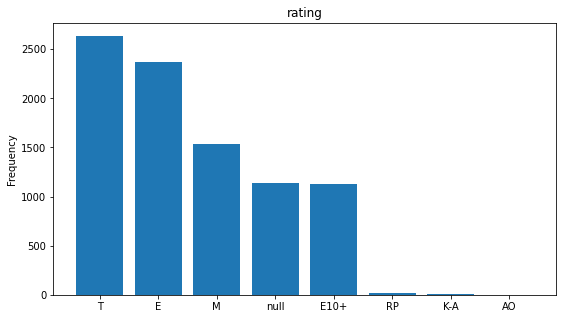

rating:
 T       2636
E       2371
M       1535
null    1140
E10+    1128
RP        14
K-A        6
AO         1
Name: rating, dtype: int64


In [18]:
b=["type","rating"]

for i in b:
    bar_plot(i)

# Visualization

<AxesSubplot:>

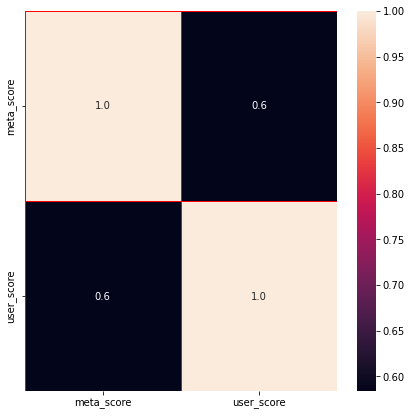

In [19]:
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(Data.corr(),annot=True,linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)

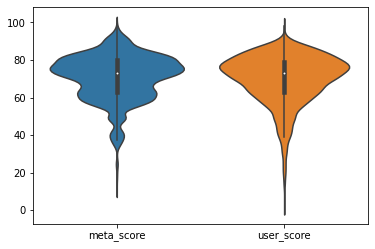

In [20]:
sns.violinplot(data=Data)
plt.show()

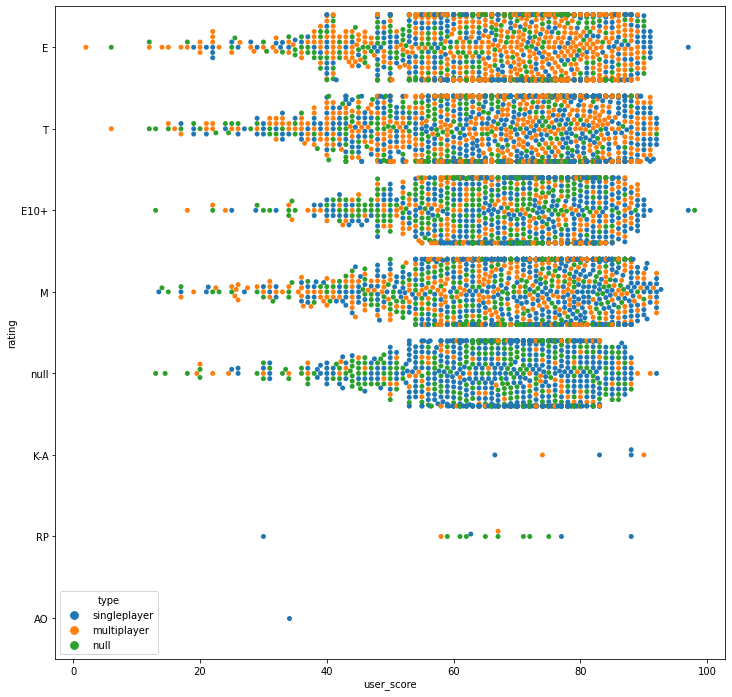

In [21]:
plt.figure(figsize=(12,12))
ax=sns.swarmplot(y="rating",x="user_score",hue="type",data=Data)
plt.show()

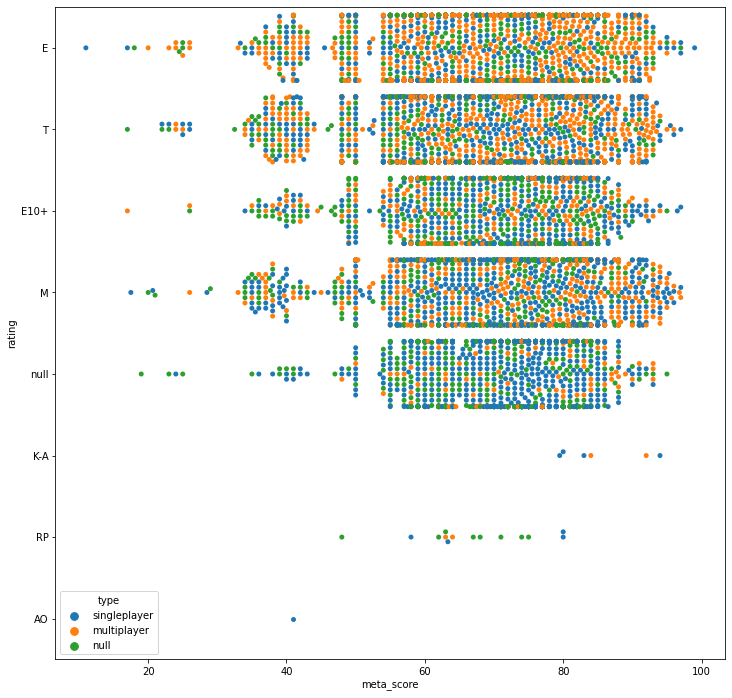

In [22]:
plt.figure(figsize=(12,12))
ax=sns.swarmplot(y="rating",x="meta_score",hue="type",data=Data)
plt.show()

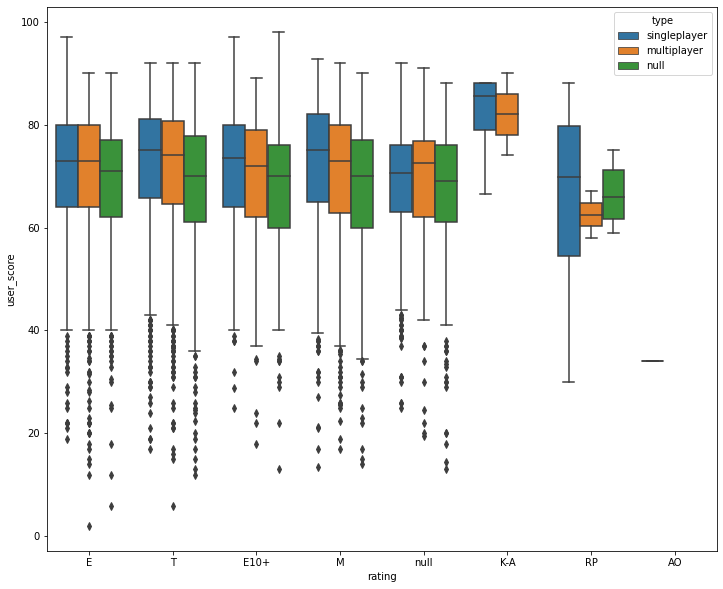

In [23]:
plt.figure(figsize=(12,10))
sns.boxplot(x="rating",y="user_score",hue="type",data=Data)
plt.show()

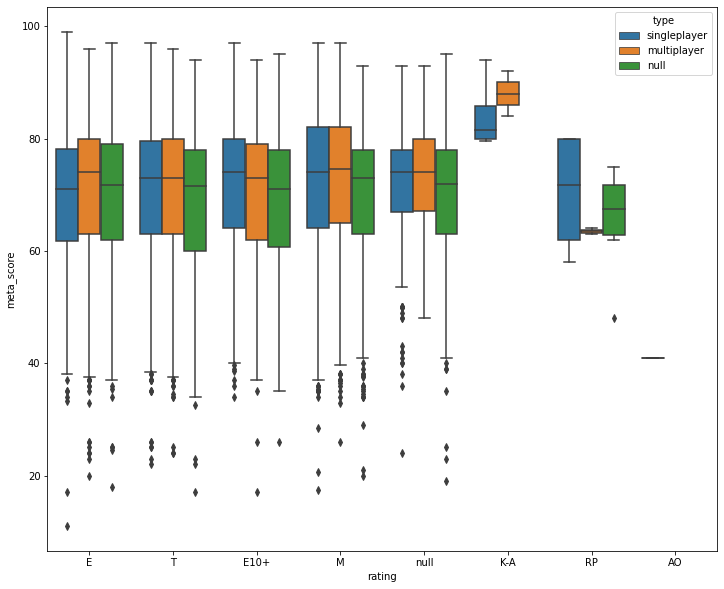

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(x="rating",y="meta_score",hue="type",data=Data)
plt.show()

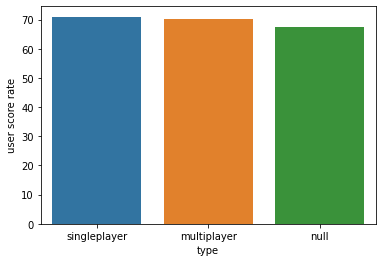

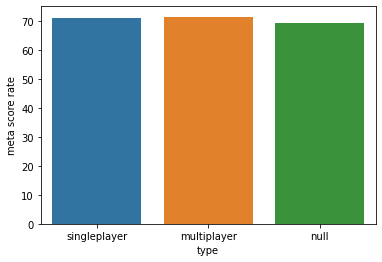

In [25]:
#type & user score ratio & meta score ratio
typelist=Data.type.unique()
userscore_ratio=[]
metascore_ratio=[]

#type & user score ratio
for i in typelist:
    x=Data[Data.type==i]
    userscore_rate=sum(x.user_score)/len(x)
    userscore_ratio.append(userscore_rate)
d_type=pd.DataFrame({"type":typelist,"userscore_ratio":userscore_ratio})
#Visualization
sns.barplot(x=d_type["type"],y=d_type["userscore_ratio"])
plt.xlabel('type')
plt.ylabel('user score rate')
plt.show()



#type & meta score ratio
for i in typelist:
    x=Data[Data.type==i]
    metascore_rate=sum(x.meta_score)/len(x)
    metascore_ratio.append(metascore_rate)
d2_type=pd.DataFrame({"type":typelist,"metascore_ratio":metascore_ratio})

#Visualization
sns.barplot(x=d2_type["type"],y=d2_type["metascore_ratio"])
plt.xlabel('type')
plt.ylabel('meta score rate')
plt.show()




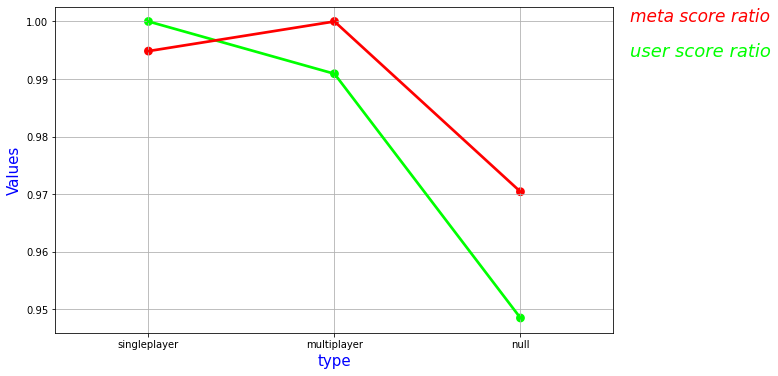

In [26]:
# user score vs mata score
d_type["userscore_ratio"]=d_type["userscore_ratio"]/max(d_type["userscore_ratio"])
d2_type["metascore_ratio"]=d2_type["metascore_ratio"]/max(d2_type["metascore_ratio"])

d3_type=pd.concat([d_type,d2_type["metascore_ratio"]],axis=1)

#Visualization
plt.figure(figsize=(10,6))
sns.pointplot(x='type',y='userscore_ratio',data=d3_type,color='lime',alpha=0.8)
sns.pointplot(x='type',y='metascore_ratio',data=d3_type,color='red',alpha=0.8)
plt.text(2.59,0.994,'user score ratio',color='lime',fontsize = 18,style = 'italic')
plt.text(2.59,1,'meta score ratio',color='red',fontsize = 17,style = 'italic')
plt.xlabel('type',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.grid()
plt.show()

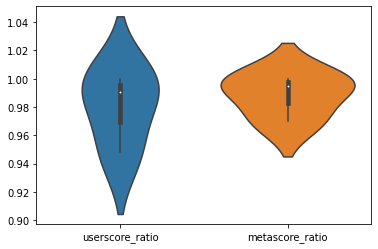

In [27]:
#violin plot shows the distribution of numbers
sns.violinplot(data=d3_type)
plt.show()

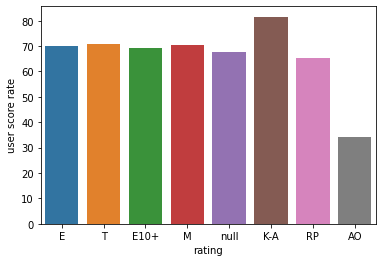

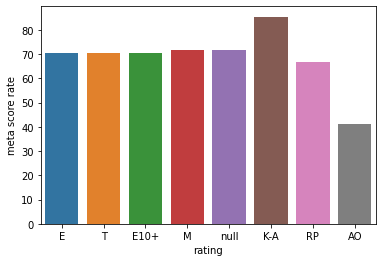

In [28]:
#rating & user score ratio & meta score ratio
ratinglist=Data.rating.unique()
userscore_ratio=[]
metascore_ratio=[]


#rating & user score ratio
for i in ratinglist:
    x=Data[Data.rating==i]
    userscore_rate=sum(x.user_score)/len(x)
    userscore_ratio.append(userscore_rate)
d_rating=pd.DataFrame({"rating":ratinglist,"userscore_ratio":userscore_ratio})

#Visualization
sns.barplot(x=d_rating["rating"],y=d_rating["userscore_ratio"])
plt.xlabel('rating')
plt.ylabel('user score rate')
plt.show()

#rating & meta score ratio
for i in ratinglist:
    x=Data[Data.rating==i]
    metascore_rate=sum(x.meta_score)/len(x)
    metascore_ratio.append(metascore_rate)
d2_rating=pd.DataFrame({"rating":ratinglist,"metascore_ratio":metascore_ratio})

#Visualization
sns.barplot(x=d2_rating["rating"],y=d2_rating["metascore_ratio"])
plt.xlabel('rating')
plt.ylabel('meta score rate')
plt.show()



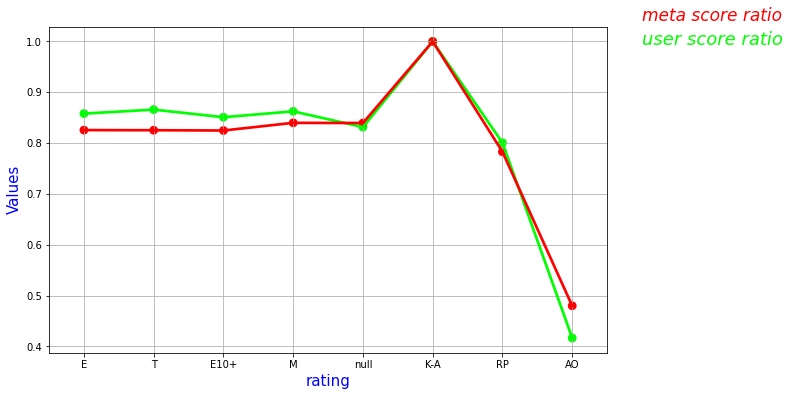

In [29]:
# user score vs mata score
d_rating["userscore_ratio"]=d_rating["userscore_ratio"]/max(d_rating["userscore_ratio"])
d2_rating["metascore_ratio"]=d2_rating["metascore_ratio"]/max(d2_rating["metascore_ratio"])

d3_rating=pd.concat([d_rating,d2_rating["metascore_ratio"]],axis=1)

#Visualization
plt.figure(figsize=(10,6))
sns.pointplot(x='rating',y='userscore_ratio',data=d3_rating,color='lime',alpha=0.8)
sns.pointplot(x='rating',y='metascore_ratio',data=d3_rating,color='red',alpha=0.8)
plt.text(8,0.994,'user score ratio',color='lime',fontsize = 18,style = 'italic')
plt.text(8,1.04,'meta score ratio',color='red',fontsize = 17,style = 'italic')
plt.xlabel('rating',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.grid()
plt.show()

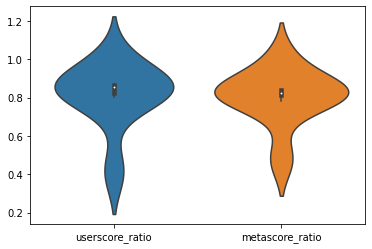

In [30]:
sns.violinplot(data=d3_rating)
plt.show()